In [9]:
import matplotlib.pyplot as plt
import os
import glob
import pathlib
import numpy as np
from PIL import Image

plt.style.use('seaborn')
plt.rcParams['font.sans-serif']=['SimHei']

In [2]:
data_dir = './data/character/'
character_csv = './data/label_character.csv'

In [3]:
images_list = glob.glob(str(pathlib.Path(data_dir)/'**/*.jpg'), recursive=True)

characters = {}
f = open(character_csv, 'r', encoding='utf-8')
for line in f.readlines():
    characters[line.split(',')[0]] = int(line.split(',')[1])

In [4]:
print('Total number of images: %d' % len(images_list))
print('Total number of characters: %d' % len(characters))

Total number of images: 138499
Total number of characters: 7328


In [38]:
character_number = {}
for item in characters.keys():
    character_number[item] = 0
    
for idx, file_path in enumerate(images_list):
    temp_char = file_path.split(os.sep)[-2]
    character_number[temp_char] += 1

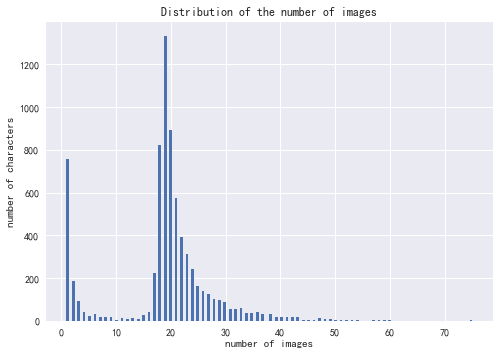

In [40]:
plt.figure()
plt.title('Distribution of the number of images')
plt.hist(list(character_number.values()), bins=150)
plt.xlabel('number of images')
plt.ylabel('number of characters')
plt.show()

In [34]:
more_than_20 = 0
more_than_30 = 0
more_than_40 = 0
more_than_50 = 0
more_than_60 = 0

for item in character_number.values():
    if item >= 60:
        more_than_60 += 1
    if item >= 50:
        more_than_50 += 1
    if item >= 40:
        more_than_40 += 1
    if item >= 30:
        more_than_30 += 1
    if item >= 20:
        more_than_20 += 1

print('Characters with more than 60 images: %d' % more_than_60)
print('Characters with more than 50 images: %d' % more_than_50)
print('Characters with more than 40 images: %d' % more_than_40)
print('Characters with more than 30 images: %d' % more_than_30)
print('Characters with more than 20 images: %d' % more_than_20)

Characters with more than 60 images: 6
Characters with more than 50 images: 33
Characters with more than 40 images: 150
Characters with more than 30 images: 609
Characters with more than 20 images: 3654


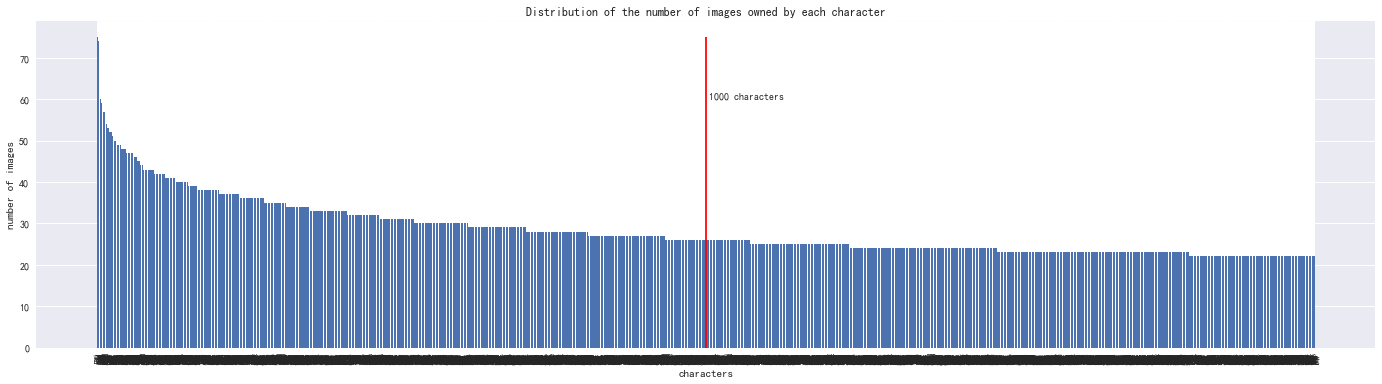

In [35]:
# sort the dict by value
character_number_sorted = sorted(character_number.items(), key=lambda d: d[1],reverse=True)
character_number_sorted = np.array(character_number_sorted)

# we use first 2000 characters to show the results
character_number_2000 = character_number_sorted[:2000]

plt.figure(figsize=(24, 6))

plt.title('Distribution of the number of images owned by each character')
plt.bar(character_number_2000[:, 0], character_number_2000[:, 1].astype(np.int))
plt.xlabel('characters')
plt.ylabel('number of images')

plt.vlines(1000, 0, 75, colors='r')
plt.text(1005, 60, '1000 characters')

plt.show()

In [13]:
image_size = []

for item in images_list:
    img = Image.open(item)
    image_size.append(img.size)

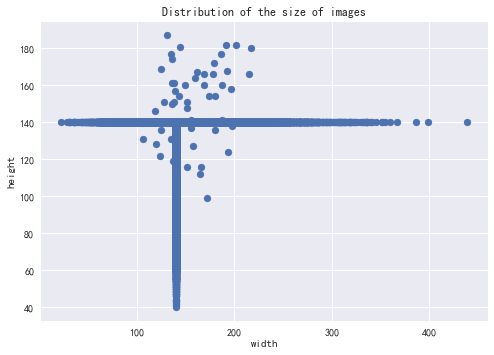

In [43]:
image_size = np.array(image_size)

plt.figure()
plt.title('Distribution of the size of images')
plt.xlabel('width')
plt.ylabel('height')

plt.scatter(image_size[:, 1], image_size[:, 0])

plt.show()